# Tugas Kecil 1
## Eksplorasi library Decision Tree Learning pada Jupyter Notebook
### Anggota
1. 13519206 - Muhammad Fawwaz Naabigh
2. 13519214 - Tanur Rizaldi Rahardjo

In [1]:
# Jalankan kode berikut untuk mendapatkan library yang dibutuhkan
# !pip install pandas sklearn decision-tree-id3

In [ ]:
# Melakukan import library pandas dan sklearn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text

In [ ]:
# Melakukan operasi load pada breast cancer dataset / dataset pertama
breast_cancer   = datasets.load_breast_cancer()
df_bc           = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_bc['target'] = breast_cancer.target

# Memisahkan fitur dan target
x_bc = df_bc.iloc[:, :-1]
y_bc = df_bc['target']

In [ ]:
# Membaca dataset play tennis / dataset kedua dari csv
df_pt = pd.read_csv("dataset/play_tennis.csv")

# Melakukan encoding untuk merubah fitur bernilai kategorikal
le = LabelEncoder()
for column in df_pt.columns:
    df_pt[column] = le.fit_transform(df_pt[column])

x_pt = df_pt.iloc[:, :-1]
y_pt = df_pt.iloc[:, -1]

In [ ]:
# Pemisahan dataset dengan partisi 80% training dan 20% testing
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_bc, y_bc, test_size=0.2, random_state=420)
x_pt_train, x_pt_test, y_pt_train, y_pt_test = train_test_split(x_pt, y_pt, test_size=0.2, random_state=420)

In [ ]:
# Fungsi untuk melakukan pembelajaran dan penilaian
from sklearn.metrics import accuracy_score, f1_score
def train_and_predict(model, x_train, y_train, x_test):
    model  = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred

def get_all_score(model, x_train, y_train, x_test, y_test):
    y_pred = train_and_predict(model, x_train, y_train, x_test)
    return [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='micro')]

##### a. DecisionTreeClassifier 

In [ ]:
from sklearn import tree

# criterion = "entropy" to use information gain measurement
# max_features = "auto" will consider sqrt(n_features) when looking for best split
# setting the random_state will make the result remain the same for every run
tree1 = tree.DecisionTreeClassifier(criterion="entropy", max_features="auto", random_state=33)
tree2 = tree.DecisionTreeClassifier(criterion="entropy", max_features="auto", random_state=5)

bc_dtl_scores = get_all_score(tree1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_dtl_scores = get_all_score(tree2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

##### b. Id3Estimator

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz
import id3.export

# prune = True will prune the tree
# gain_ratio = True will use gain ratio on split calculations
estimator1 = Id3Estimator(prune=True, gain_ratio=True)
estimator2 = Id3Estimator(prune=True, gain_ratio=True)

bc_id3_scores = get_all_score(estimator1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_id3_scores = get_all_score(estimator2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

##### c. KMeans

In [ ]:
from sklearn.cluster import KMeans

# setting the random_state will make the result remain the same for every run
kmeans1 = KMeans(n_clusters=2, max_iter=10000, random_state=13) # Memiliki kanker? (yes/no)
kmeans2 = KMeans(n_clusters=2, max_iter=10000, random_state=7) # Bermain tenis? (yes/no)

bc_kmeans_scores = get_all_score(kmeans1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_kmeans_scores = get_all_score(kmeans2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

###### d. LogisticRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression

logres1 = LogisticRegression(max_iter=10000)
logres2 = LogisticRegression(max_iter=10000)

bc_logres_scores = get_all_score(logres1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_logres_scores = get_all_score(logres2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

##### e. Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# solver = 'lbfgs' will use lbfgs algorithm for weight optimization.
# the consideration of using 'lbfgs' is that it performs better in small datasets
mlp1 = MLPClassifier(max_iter=50000, solver="lbfgs")
mlp2 = MLPClassifier(max_iter=50000, solver="lbfgs")

bc_mlp_scores = get_all_score(mlp1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_mlp_scores = get_all_score(mlp2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

##### f. SVM

In [ ]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear')
svc2 = SVC(kernel='linear')

bc_svc_scores = get_all_score(svc1, x_bc_train, y_bc_train, x_bc_test, y_bc_test)
pt_svc_scores = get_all_score(svc2, x_pt_train, y_pt_train, x_pt_test, y_pt_test)

## Analisis Score

In [ ]:
index = [
    'Decision Tree',
    'Id3 Estimator',
    'KMeans',
    'Logistic Regression',
    'Neural Network',
    'SVM'
]

columns = ['Accuracy', 'f1']

In [ ]:
data_bc = [
    bc_dtl_scores,
    bc_id3_scores,
    bc_kmeans_scores,
    bc_logres_scores,
    bc_mlp_scores,
    bc_svc_scores
]


df_scores_bc = pd.DataFrame(data=data_bc, index=index, columns=[["Breast Cancer" for i in range(len(columns))], columns])

In [ ]:
data_pt = [
    pt_dtl_scores,
    pt_id3_scores,
    pt_kmeans_scores,
    pt_logres_scores,
    pt_mlp_scores,
    pt_svc_scores
]


df_scores_pt = pd.DataFrame(data=data_pt, index=index, columns=[["Play Tennis" for i in range(len(columns))], columns])

In [ ]:
df_scores = pd.concat([df_scores_bc, df_scores_pt], axis=1)

#### Berikut adalah tree dari DecisionTreeClassifier

In [ ]:
print(export_text(tree1))

In [ ]:
print(export_text(tree2))

#### Berikut adalah hasil skor akurasi dan f1 secara kesulurahan

In [ ]:
df_scores

Terlihat bahwa pada dataset `Breast Cancer` skor yang didapatkan relatif lebih tinggi dibandingkan dengan dataset `Play Tennis`. Hal ini disebabkan jumlah data yang dimiliki oleh dataset `Play Tennis` sangatlah sedikit, yaitu 14 baris data. Sementara itu, dataset `Breast Cancer` memiliki 569 baris data.

#### Decision Tree

Pada *decision tree*, secara default atribut `criterion` yang dipakai bernilai `gini` yang mengimplementasikan Gini Impurity. Sementara itu, pada kode di sini, digunakan `criterion` bernilai `entropy` untuk menggunakan Information Gain sebab menghasilkan skor yang lebih baik. Sementara itu, atribut `max_features`, yang merupakan jumlah fitur yang dipertimbangkan saat melakukan pemilihan *best split*, secara default bernilai `None`, tetapi di sini dipakai nilai `auto` yang akan menggunakan sebanyak $\sqrt{jumlah fitur}$ sebagai pertimbangan untuk pemilihan *best split* agar menghasilkan skor yang lebih baik. Selain itu, atribut `random_state` juga di-*assign* dengan nilai tertentu agar selalu menghasilkan nilai yang sama setiap kali dijalankan.

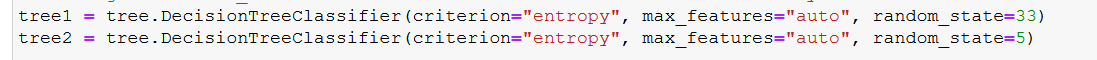

#### Id3 Estimator

Pada *Id3 Estimator* digunakan 2 atribut untuk *tuning*, yaitu `prune` dan `gain_ratio` yang menerima nilai `boolean`. Atribut `prune` yang bernilai `True` akan mengimplmentasikan *pruning* pada *tree* yang dibuat yang menghasilkan nilai skor yang lebih baik dibandingkan dengan tidak diimplementasikan. Sementara itu, `gain_ratio` yang bernilai `True` akan mengimplementasikan *gain ratio* untuk kalkulasi pada saat *splitting tree*. Pengimplementasian *gain ratio* ini menghasilkan nilai skor yang lebih baik.

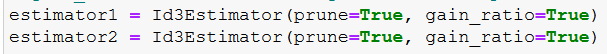

#### KMeans

Algoritma pembelajaran *unsupervised* ini memiliki nilai akurasi dan f1 terendah dibandingkan 5 algoritma pembelajaran yang lain. Hal ini disebabkan karena jumlah kluster default bernilai 8. Berikut adalah potongan dari dokumentasi sklearn
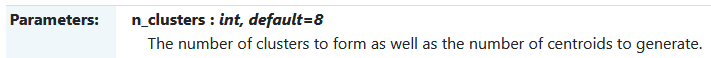

Karena label pada kedua dataset hanyalah 2, hal tersebut akan menyebabkan hasil pembelajaran yang cukup jelek dibandingkan algoritma *supervised*. Untuk meningkatkan hal tersebut, digunakan parameter `n_clusters` bernilai 2. Selain itu, atribut `max_iter` yang merupakan jumlah iterasi maksimal yang dilakukan untuk pembelajaran di-*assign* dengan nilai 10000 dan `random_state` di-*assign* dengan nilai tertentu agar pada setiap kali dijalankan, menghasilkan hasil yang sama.

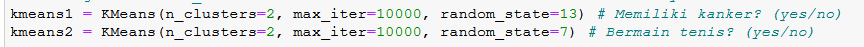

#### Logistic Regression

Algoritma pembelajaran ini berjalan dengan cukup baik tanpa perlu dilakukan *tuning*. Namun sklearn mengeluarkan *warning* bahwa fungsi prediksi belum mencapai konvergen. Untuk mengatasi hal tersebut dapat ditingkatkan proses iterasi regresi agar fungsi prediksi dapat masuk kedalam daerah konvergen yang didefinisikan sklearn.

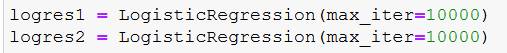

#### Neural Network

Pada algoritma ini, digunakan atribut `solver` dengan nilai `lbfgs` yang secara default bernilai `adam`. Atribut ini mendefinisikan algoritma *weight optimization* yang digunakan pada proses pelatihan. Menurut dokumentasi, `adam` akan mengimplementasikan *stochastic gradient-based optimizer*, sementara itu `lbfgs` mengimplementasikan *quasi-Newton methods*. Pemilihan `lbfgs` dibandingkan dengan yang lainnya adalah sebab *optimizer* ini dapat konvergen lebih cepat dan memiliki performa yang lebih baik untuk data yang sedikit. Mengingat kedua dataset yang dipakai cukup sedikit, yaitu 569 dan 14 baris data.

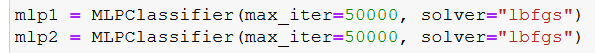

#### SVM

Pada algoitma *classifier* ini, didapatkan skor yang cukup baik tanpa dilakukan *tuning* sama sekali. Namun, pemilihan nilai `linear` pada atribut `kernel` dapat meningkatkan skor hingga 0.96 pada dataset `Breast Cancer`. Atribut ini, secara default bernilai `rbf`.

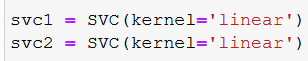